# Introduction

In this homework you will see what [word embeddings](https://en.wikipedia.org/wiki/Word_embedding) are, how to train them and how to evaluate them. Word embeddings are widely used in practice and you will most likely use them in your projects. Keep in mind that training a neural network can take time, so before running the notebook please test your implementation on a smaller subset of your dataset.

__You will learn:__
- To implement your own neural network that trains word embeddings (using the code from the previous homework)
- Learn how to run intrinsic evaluations on the obtained embeddings
- Compare your own embeddings to the pre-trained ones

__You will need:__

- To install the `gensim` package as `pip install gensim`
- Access to GPUs
- The code from your second homework

Once you complete this assignment, submit it as:

`submit arum hw3 <name_of_your_notebook>`


In [1]:
# Make sure that execution of this cell doesn't return any errors. If it does, go the class repository and follow the environment setup instructions
import time
from collections import defaultdict, Counter

import matplotlib.pyplot as plt
import numpy as np
import torch
from gensim.models import KeyedVectors
from torch.utils.data import Dataset, DataLoader
from nltk import word_tokenize

% matplotlib inline
plt.style.use('seaborn-paper')

## 1. Training a skip-gram model

The skip-gram model is a subtype of the [Word2Vec model ](https://en.wikipedia.org/wiki/Word2vec) that aims to predict context words given a target word. In the previous homework, you implemented all the necessary classes to feed the data in the skip-gram model. In this step, you will implement the model architecture and the training loop. You will then put everything together to train the skip-gram model, save the trained word embeddings, and evaluate them.

The high-level overview of this part of the homework is as follows:

- Complete the `SkipGramModel` class:
    * Initialize the layers
    * Complete the `forward()` method
    * Complete the `save_embeddings()` method
- Prepare the data. Use the code from the previous homework to:
    * Tokenize the input text
    * Construct and prune the vocabulary
    * Initialize the `SkipGramDataset` class
    * Initialize the `DataLoader` class
    * Initialize the model class
- Complete the training loop:
    * Fetch the input batches from the dataloader
    * Run the inputs through the model and get the predictions
    * Calculate the loss
    * Backpropagate the error
    * Update the weights
    * Save the embeddings
- Visualize the learning curve

__Insert the code for the `preprocess()` function, the `Vocabulary` class, and the `SkipGramDataset` class in the corresponding cells below and execute those cells. Follow the instructions below to complete this part of the homework.__


In [2]:
def preprocess(data):
    pass

In [3]:
class Vocabulary:
    def __init__(self, special_tokens=None):
        pass

In [4]:
class SkipGramDataset(Dataset):
    def __init__(self, data, vocab, skip_window=3):
        super().__init__()
        pass

All the models implemented in PyTorch should subclass the [`torch.nn.Module` class](https://pytorch.org/docs/stable/nn.html?highlight=module#torch.nn.Module). The main method of this class (which is used by a lot of other PyTorch classes) is `forward()`. `forward()` is the core method that defines how your model is going to run and what outputs it should produce given the inputs. 
In the constructor of the your model class you should initialize all the layers you are going to use. The skip-gram model is conceptually simple - it stores embeddings in a trainable matrix and projects the target word's embedding to a vector of the vocabulary size for making a prediction about the context word. Your task is to complete the code in the `SkipGramModel` class below. Please refer to the [documentation of PyTorch](https://pytorch.org/docs/stable/nn.html) to correctly initialize the layers.

__Instructions__:

- Complete the class constructor
    * Initialize the `nn.Embedding` layer
    * Initialize the `nn.Linear` projection layer
- Complete the `forward()` method that takes a tensor of the shape [Bx1] and returns a prediction vector of the shape [BxV], where B is the batch size and V is the vocabulary size.
- Complete the `save_embeddings()` method that extracts the weights of the embedding layers and saves them to a file. The format of the file should be as follows:

```
<number_of_words> <dimension>
<word1>                <num_1> <num_2> ... <num_dimension>
<word2>                <num_1> <num_2> ... <num_dimension>
...
<word_number_of_words> <num_1> <num_2> ... <num_dimension>
```
For more details, please refer to the section 2 of this notebook.

__Notes__:

- The weights of a layer can be extracted using the `weight` attribute.
- To convert `torch.Tensor` to a `numpy` array you first need to detach it from the current computational graph and then transfer it to CPU, which can be done using a chain of the `.detach()` and the `.cpu()` methods


In [5]:
class SkipGramModel(torch.nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        """
        Args:
            vocab_size (int): vocabulary size
            embedding_dim (int): the dimension of word embeddings
        """
        ### INSERT YOUR CODE BELOW ###

        
        ### INSERT YOUR CODE ABOVE ###

    def forward(self, inputs):
        """
        Perform the forward pass of the skip-gram model.
        
        Args:
            inputs (torch.LongTensor): input tensor containing batches of word id pairs [Bx1]
        Returns:
            outputs (torch.FloatTensor): output tensor with unnormalized probabilities over the vocabulary [BxV]
        """
        ### INSERT YOUR CODE BELOW ###
        outputs = None
        ### INSERT YOUR CODE ABOVE ###
        return outputs
    
    def save_embeddings(self, voc, path):
        """
        Save the embedding matrix to a specified path.
        
        Args:
            voc (Vocabulary): the Vocabulary object for id-to-token mapping
            path (str): the location of the target file
        """
        ### INSERT YOUR CODE BELOW ###
        embeddings = None
        with open(path, 'w') as f:
            pass
        ### INSERT YOUR CODE ABOVE ###
        print("Successfuly saved to {}".format(path))

The code in the cell below reads the data, initializes all the classes and parameters necessary for training. Please carefully read through, understand, and run the code. 

__Notes__:

- We are going to use the [CrossEntropy loss](https://en.wikipedia.org/wiki/Cross_entropy) which is a standard loss function for classification tasks. For numeric stability, [PyTorch implementation of the cross entropy function](https://pytorch.org/docs/stable/nn.html?highlight=crossentropy#torch.nn.CrossEntropyLoss) combines the log softmax function and the negative loglikelihood loss computation. Because of this, you don't need to apply the softmax function to the output of your model.

- We are going to use the [Adagrad optimizer](https://pytorch.org/docs/stable/optim.html?highlight=adagrad#torch.optim.Adagrad) for gradient descent optimization.

- For the sake of speed, we encourage you to keep the values of the parameters as they are. However, after you complete the assignment, feel free to change them to see what effect this would have on the model's performance (but keep in mind that training can take much longer).

- It is always a good idea to shuffle the dataset (think why).

In [6]:
# DATA PROCESSING #
with open('text8.txt') as f:
    data = f.read()
tokens = preprocess(data[:1000000])

# CONSTRUCTING VOCABULARY #
voc = Vocabulary()
voc.add_tokens(tokens)
voc.prune(5)
vocab_size = len(voc)

# TRAINING PARAMETERS #
embedding_dim = 128
skip_window = 2
batch_size = 512
lr = 0.1
num_epochs = 100
report_every = 5

# DATASET
dataset = SkipGramDataset(tokens, voc, skip_window=skip_window)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

# MODEL
model = SkipGramModel(vocab_size=vocab_size, embedding_dim=embedding_dim)
if torch.cuda.is_available():
    model = model.cuda()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=lr)

Now that the model and the dataset are ready, we will be looking at the training loop structure.
Essentially, training of any neural network is an iterative process of (a) sampling a batch of training examples, (b) running them through the model, (c) computing the loss based on the predictions and the target labels, (d) performing the backward pass and computing the gradients, and (e) updating the model's weights. Keeping this logic in mind, complete the code in the cell below. 

__! Important__:
Because PyTorch accumulates the gradients on subsequent backward passes, you will need to manually set the gradients to zero at every iteration to correctly update the parameters of your model. You can set the gradients to zero using the `zero_grad()` method of the used optimizer (in our case, Adagrad). 

__Instructions__:
Complete the code below using the following methods:
- [`zero_grad()`](https://pytorch.org/docs/stable/optim.html?highlight=zero_grad#torch.optim.Optimizer.zero_grad) and [`step()`](https://pytorch.org/docs/stable/optim.html?highlight=step#torch.optim.Optimizer.step) methods for optimizers
- [`backward()`](https://pytorch.org/docs/stable/autograd.html?highlight=backward#torch.autograd.backward) method for the loss
- [`item()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.item) method for converting a `torch.Tensor` object of the size [1] to a float number
- `cuda()` method for transferring tensors to GPUs

__Notes__:

- You can always verify if your model is training correctly - the loss should be decreasing. Please keep track of your epoch losses, since you will need them to plot the learning curve later.

- __Warning__: The execution of the cell below will take time depending on the selected batch size, the number of epochs and the size of the dataset. If you are not sure your implementation is correct, test it on a small subset of the dataset (you can manually reduce the dataset by cutting off a portion of the dataset right after you load it) and using a small number of epochs.


In [7]:
# TRAINING #
tick = time.time()
epoch_losses = []
for epoch_num in range(1, num_epochs + 1):
    batch_losses = []
    for i, batch in enumerate(data_loader):
        ### YOUR CODE BELOW ###
        # Zero the gradients

        # Extract the inputs and the targets
        inputs, targets = None
        
        # Transfer the inputs and the targets to GPUs, if available
        if torch.cuda.is_available():
            pass

        # Run the model
        outputs = None

        # Compute the loss
        loss = None
        
        # Backpropagate the error
        
        # Update the parameters

        # Append the loss
        batch_losses.append(None)
        ### YOUR CODE ABOVE ###
        
    epoch_loss = np.mean(np.array(batch_losses))
    epoch_losses.append(epoch_loss)

    if epoch_num % report_every == 0:
        tock = time.time()
        print("Epoch {}. Loss {:.4f}. Elapsed {:.0f} seconds".format(epoch_num, epoch_loss, tock-tick))

print("Total time elapsed: {:.0f} minutes".format((tock-tick)/60))

Epoch 5. Loss 5.4620. Elapsed 14 seconds
Epoch 10. Loss 5.2863. Elapsed 27 seconds
Epoch 15. Loss 5.1994. Elapsed 41 seconds
Epoch 20. Loss 5.1438. Elapsed 54 seconds
Epoch 25. Loss 5.1042. Elapsed 67 seconds
Epoch 30. Loss 5.0739. Elapsed 80 seconds
Epoch 35. Loss 5.0498. Elapsed 94 seconds
Epoch 40. Loss 5.0300. Elapsed 107 seconds
Epoch 45. Loss 5.0133. Elapsed 122 seconds
Epoch 50. Loss 4.9990. Elapsed 135 seconds
Epoch 55. Loss 4.9865. Elapsed 149 seconds
Epoch 60. Loss 4.9755. Elapsed 162 seconds
Epoch 65. Loss 4.9658. Elapsed 175 seconds
Epoch 70. Loss 4.9569. Elapsed 188 seconds
Epoch 75. Loss 4.9490. Elapsed 202 seconds
Epoch 80. Loss 4.9418. Elapsed 215 seconds
Epoch 85. Loss 4.9351. Elapsed 229 seconds
Epoch 90. Loss 4.9290. Elapsed 242 seconds
Epoch 95. Loss 4.9233. Elapsed 254 seconds
Epoch 100. Loss 4.9181. Elapsed 267 seconds
Total time elapsed: 4 minutes


Now that the model is trained, save the weights of the embedding layer by calling the `save_embeddings()` method. For consistency, we suggest that you name your embeddings file as `skipgram_trained.vec`, because we will use this file later in the homework. If you decide to stick with a different name, make sure to make changes to the code in the next part of the homework.

In [8]:
# Saving results #
### YOUR CODE BELOW ###

### YOUR CODE ABOVE ###

Successfuly saved to skipgram_trained.vec


Visualize the learning curve of your model using the `matplotlib` library.

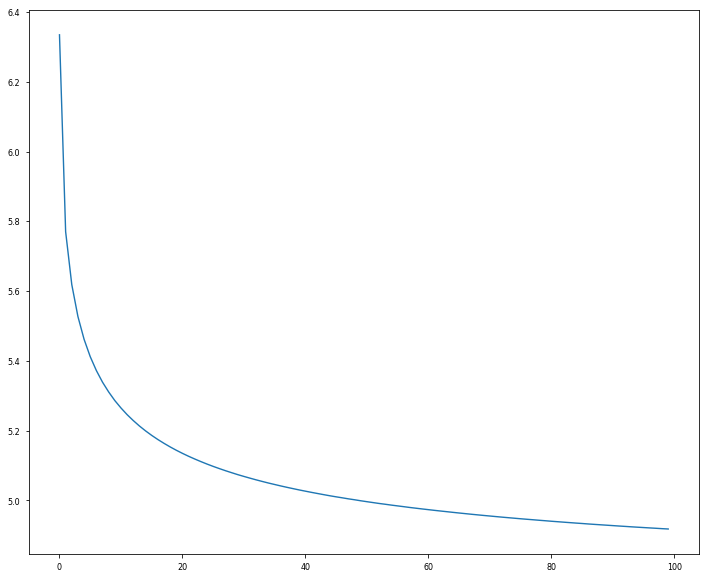

In [9]:
# Plot the learning curve
### YOUR CODE BELOW ###


### YOUR CODE ABOVE

Now that you trained your own word embeddings, you will evaluate and compare them to the publicly available pre-trained embeddings released by Facebook.

## 2. Using pre-trained word embeddings

### 2.0 Loading the data

In this part of the homework we will use pre-trained word embeddings and explore their properties. In particular, we will use [fastText](https://fasttext.cc/) embeddings trained on the Wikipedia data. The easiest way to use pre-trained embeddings is to download them from the official website and use the [gensim](https://radimrehurek.com/gensim/) library. This library allows you to easily load pre-trained embeddings from several widely used formats (such as .txt or binary) and perform simple operations on the loaded vectors. Some of the commonly used functions are calculating the similarity between two tokens and finding tokens that are most similar to the given one.

Recall that Jupyter notebook allows executing shell commands directly from within the notebook. Anything appearing after `!` on a line will be executed not by the Python kernel, but by the system shell. 

__Instructions__:

- Execute the cells below to download the embeddings file and make sure it was unzipped to your directory without any errors.

__Note__:
- The downloaded archive will take up 650 MB of your disk space; the unzipped file requires additional 2.2 GB.


In [10]:
!wget --no-clobber https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
!unzip -n wiki-news-300d-1M.vec.zip

File ‘wiki-news-300d-1M.vec.zip’ already there; not retrieving.

Archive:  wiki-news-300d-1M.vec.zip


In [11]:
!ls -lh wiki-news-300d-1M*

-rw-r--r-- 1 okovaleva okovaleva 2.2G Mar 14  2018 wiki-news-300d-1M.vec
-rw-rw-r-- 1 okovaleva okovaleva 651M Jan 18 11:26 wiki-news-300d-1M.vec.zip


Note that the `.vec` file is just a text file in a special format. Namely, the first line contains the total number of tokens and the size (length) of the embeddings separted by a space. In our case the first line is `999994 300`, which means that this file contains embeddings for 999994 unique tokens and the every embeddings is a 300-dimensional vector.
The following lines contain the embeddings themselves in the format `<word1>  <num_1> <num_2> ... <num_dimension>`. Feel free to open it in your favorite text editor and to see what it looks like.

Now let's load the embeddings using the `gensim` library. It contains a convenient `KeyedVectors` class that provides basic methods for working with embeddings. See the [documentation](https://radimrehurek.com/gensim/models/keyedvectors.html) for details.
After having loaded the embeddings you can perform different operations on them. In particular, you can obtain the embedding of a token through the indexing operation.

__Instructions:__

- Execute the cells below to see what the loaded vectors look like. 

In [12]:
# Loading vectors
word_vectors = KeyedVectors.load_word2vec_format('wiki-news-300d-1M.vec', binary=False)

In [13]:
# Extracting an embedding of a single word
v1 = word_vectors['cat']
print("The dimension of the loaded embedding is {}".format(v1.shape))
print("The word 'cat' is represented by the following vector:")
print(v1)

The dimension of the loaded embedding is (300,)
The word 'cat' is represented by the following vector:
[-1.339e-01  2.230e-02 -1.370e-02  2.932e-01  4.090e-02  5.750e-02
  3.071e-01 -1.292e-01  2.580e-02  6.300e-03  5.870e-02 -5.850e-02
  3.460e-02 -3.120e-02 -1.732e-01  3.100e-03  2.958e-01 -7.800e-02
 -1.700e-03 -1.413e-01 -1.614e-01 -1.175e-01 -1.075e-01  3.200e-02
 -1.782e-01 -1.970e-02 -6.160e-02  1.705e-01 -4.760e-02  7.560e-02
 -3.200e-03 -1.392e-01  2.340e-02  6.500e-02 -4.540e-02 -1.908e-01
  9.710e-02  5.350e-02 -6.320e-02  3.850e-02 -9.830e-02  2.478e-01
 -3.940e-02 -8.490e-02 -7.500e-02  9.900e-03 -5.580e-02 -1.653e-01
 -9.400e-02  1.610e-02  5.890e-02 -9.200e-02 -6.695e-01 -1.776e-01
  9.410e-02 -9.550e-02  2.543e-01  7.700e-02 -2.020e-02 -9.390e-02
  1.804e-01 -2.320e-02 -9.140e-02 -2.394e-01 -9.150e-02 -4.700e-03
  1.052e-01  6.460e-02 -1.324e-01  2.310e-02 -1.296e-01  7.170e-02
  1.515e-01  1.323e-01  1.476e-01 -2.049e-01 -6.570e-02 -1.111e-01
 -1.320e-01 -8.600e-02 -4.

### Exploration of  word embeddings properties
In this step you will explore the properties of word embeddings and look at what operations you can perform on word vectors. 

__Instructions:__

- Complete the code in the cells below by calling the appropriate methods of the `KeyedVectors` class and execute the cells to answer the questions.


### 2.1 Find top 3 most similar in terms of cosine similarity words and their similarity to the word `cat`

In [14]:
### YOUR CODE BELOW ###
top3_most_similar = []
### YOUR CODE ABOVE ###

for word, similarity in top3_most_similar:
    print('{}: {:.3f}'.format(word, similarity))

cats: 0.855
feline: 0.739
kitten: 0.735


### 2.2 Find the most similar word to the word `good`

In [15]:
### YOUR CODE BELOW ###
most_similar_to_good = []
### YOUR CODE ABOVE ###

print('The most similar word to the word "good" is the word "{}"'.format(most_similar_to_good[0]))
print('The corresponding cosine similarity is {:.3f}'.format(most_similar_to_good[1]))

The most similar word to the word "good" is the word "bad"
The corresponding cosine similarity is 0.833


Why do you think this happened?

__YOUR ANSWER HERE__


### 2.3 Find the cosine similarity between the words `woman` and `man`

In [16]:
### YOUR CODE BELOW ###
similarity = None
### YOUR CODE ABOVE ###

print('The cosine similarity between "woman" and "man" is {:.3f}'.format(similarity))

The cosine similarity between "woman" and "man" is 0.816


### 2.4 Vector arithmetics
The original word2vec paper illustrates the properties of word embeddings through showing examples of analogies. Perhaps the most famous example is the `king::man` <=> `queen::woman` analogy.
To make sure this analogy holds true in the embedding space, one would need to do the following:

 1. Get the vectors for the words "woman", "king", and "man"
 2. Add the vectors for "woman" and "king" together
 3. Substract the vector for the word "man" from the result
 4. Find the word with the closest embedding (likely one will end up with the word "queen")
 
In this question we will explore a similar example on verb tenses and how they are captured in the learned word embeddings. 

__Instructions:__
- Print the the closest word to the vector $\text{walking} + \text{swam} - \text{swimming}$.

__Note__: use vector arithmetics operations (`+` and `-`) and the method `similar_by_vector` of the `KeyedVectors` class.

In [17]:
v1 = word_vectors["walking"]
v2 = word_vectors["swam"]
v3 = word_vectors["swimming"]

### YOUR CODE BELOW ###
v4_word = None
### YOUR CODE ABOVE ###

print('Resulting word: {}'.format(v4_word[0]))
print('Similarity: {:.3f}'.format(v4_word[1]))

Resulting word: walked
Similarity: 0.816


## 3. Comparing embeddings

Using the same evaluation methods, you will now compare the embeddings you trained yourself with the pre-trained fastText embeddings. Execute the cell below to load the word vectors (change the names of the files if needed).

__Note__:
The execution of the cell below can take a while to finish (a few minutes).

In [18]:
fasttext = KeyedVectors.load_word2vec_format('wiki-news-300d-1M.vec', binary=False)
skipgram = KeyedVectors.load_word2vec_format('skipgram_trained.vec', binary=False)

### 3.1 Print out three most similar words (along with the similarities) to the word `money` for the both models.

In [19]:
### YOUR CODE BELOW ###
top3_similar_fasttext = []
print("Pretrained model: \n ", top3_similar_fasttext)
top3_similar_skipgram = []
print("Skip-gram model: \n ", top3_similar_skipgram)
### YOUR CODE ABOVE ###

Pretrained model: 
  [('cash', 0.7241491079330444), ('moeny', 0.7205635905265808), ('funds', 0.7183815836906433)]
Skip-gram model: 
  [('defeat', 0.3276408314704895), ('grants', 0.315249502658844), ('attack', 0.30059361457824707)]


### 3.2 For the both models, compute the cosine similarities between the words `boy` and `man`.


In [20]:
### YOUR CODE BELOW ###
fasttext_similarity = None
print("Pretrained model: \n ", fasttext_similarity)
skipgram_similarity = None
print("Skip-gram model: \n ", skipgram_similarity)
### YOUR CODE ABOVE ###

Pretrained model: 
  0.68067825
Skip-gram model: 
  0.072558746


### 3.3 Can you suggest at least four ways in which the performance of your skip-gram model can be improved?

__YOUR ANSWER HERE__